In [22]:
import numpy as np
import os
import geopandas as gpd
import pandas as pd
from scipy import stats as scipy_stats
import scipy.signal
import rasterio
import rasterio.features
from rasterio import MemoryFile
from affine import Affine
from rasterio.plot import show
from rasterio.plot import show_hist
import matplotlib.pyplot as plt
import rasterstats
from shapely.geometry import Polygon, shape

# Import libs
import sys
module_path = os.path.abspath(os.path.join('..', 'libs'))
if module_path not in sys.path:
    sys.path.append(module_path)
from s3utils import *

In [32]:
S3R = S3Helper('roof-index')
slope_path = "missoula/geospatial/downtown_slope.tif" 
slope = S3R.read_tif_from_s3_as_rio(slope_path) 
slope_arr = slope.read(1)
slope_arr = np.where(slope_arr < 0, 0, slope_arr)
slope.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -9999.0,
 'width': 1571,
 'height': 1645,
 'count': 1,
 'crs': CRS.from_epsg(6514),
 'transform': Affine(0.9144000000087544, 0.0, 257075.3304003399,
        0.0, -0.9144000000087544, 301627.6416007468)}

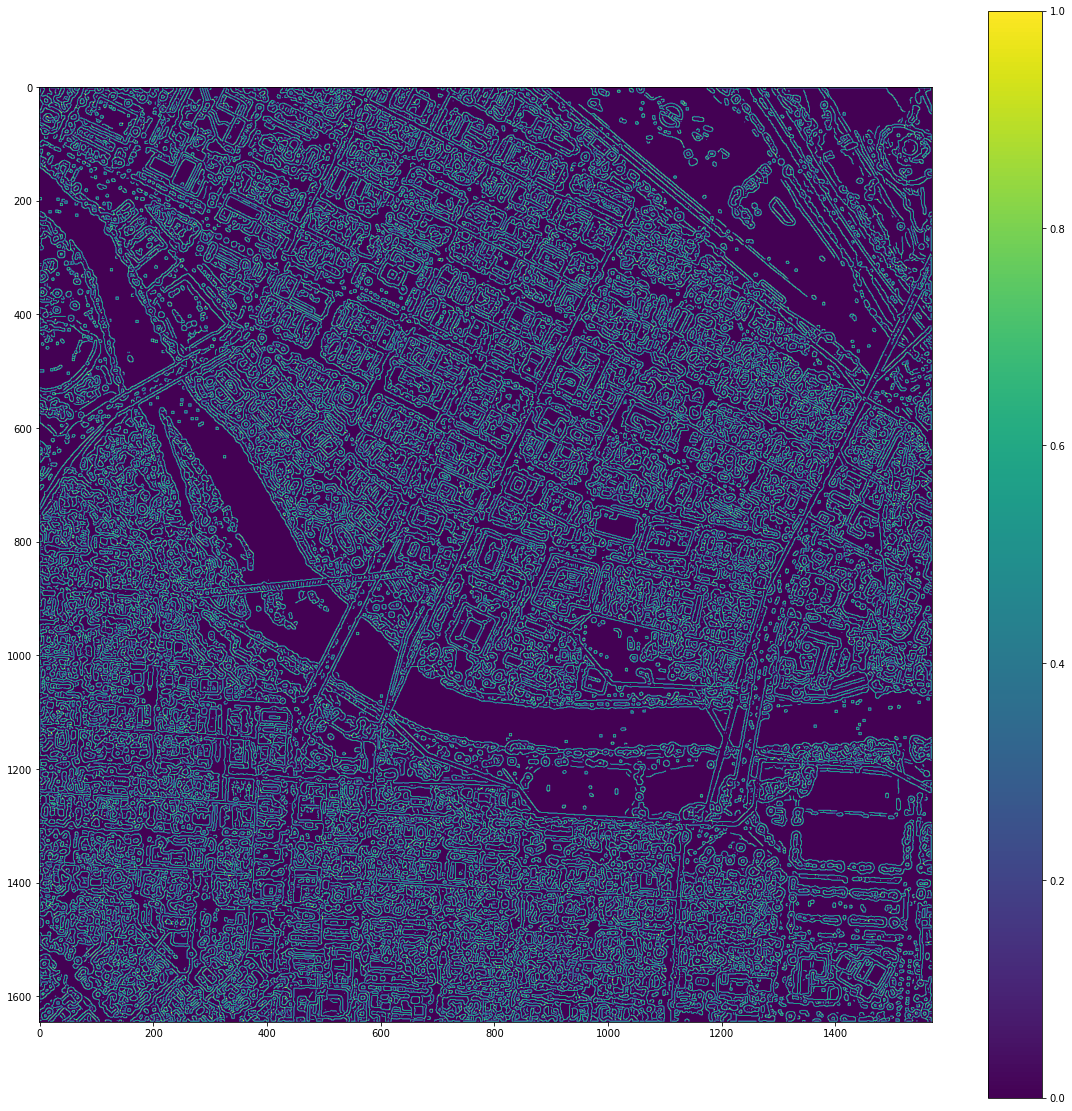

(1645, 1571) (1645, 1571)


In [62]:
from skimage.feature import canny
from skimage.filters import sobel

normalized = (slope_arr - np.min(slope_arr))/(np.max(slope_arr) - np.min(slope_arr))

canny_arr = canny(normalized, sigma=2, use_quantiles=True)

fig, ax = plt.subplots(1,1, figsize=(20,20))
plt.imshow(canny_arr)
plt.colorbar()
plt.show()
print(normalized.shape, canny_arr.shape)

In [63]:
memfile = MemoryFile()
edges = memfile.open(**slope.profile)
edges.write(canny_arr[np.newaxis].astype(np.float32))

bldgs_path = "missoula/geospatial/downtown_bldgs.zip"
bldgs = S3R.read_shp_from_s3_as_gpd(bldgs_path).to_crs(6514)
bldgs

,fid,AVG_HEIGHT,MIN_LAG,area_sq_ft,geometry
0,1.0,27.32460,3202.73,44334.900,"MULTIPOLYGON (((257091.482 300124.221, 257092...."
1,2.0,11.80030,3204.72,5449.480,"POLYGON ((257170.740 300266.436, 257176.161 30..."
2,3.0,11.44360,3205.74,3658.490,"POLYGON ((257170.172 300185.933, 257168.625 30..."
3,4.0,30.45860,3205.99,13970.200,"MULTIPOLYGON (((257408.449 300123.800, 257416...."
4,5.0,10.99220,3204.42,6748.850,"POLYGON ((257175.485 300291.266, 257164.191 30..."
...,...,...,...,...,...
958,959.0,10.41030,3217.27,566.998,"POLYGON ((258263.976 301156.751, 258261.521 30..."
959,960.0,17.13810,3214.29,2976.740,"POLYGON ((258224.819 301179.597, 258233.395 30..."
960,961.0,16.08160,3217.24,1456.870,"POLYGON ((258300.759 301228.699, 258299.919 30..."
961,962.0,9.34612,3216.50,272.249,"POLYGON ((258217.425 301179.456, 258220.866 30..."


<AxesSubplot:>

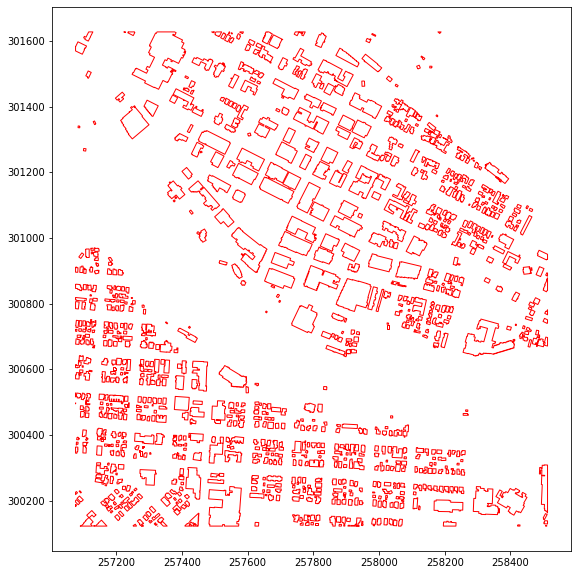

In [69]:
from rasterio.plot import show

fig, ax = plt.subplots(1,1, figsize=(10,10))
# show(edges, ax = ax, title= 'Edges')
bldgs.plot(ax = ax, facecolor='None', edgecolor='red')

In [74]:
edges.read(1)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)